In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [2]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train['MSSubClass'].value_counts

<bound method IndexOpsMixin.value_counts of 0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64>

Now, we'll do exploratory analysis and see if there data is skewed in any way

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '1-1/2 STORY - UNFINISHED ALL AGES'),
  Text(1, 0, '1-1/2 STORY FINISHED ALL AGES'),
  Text(2, 0, '1-STORY 1945 & OLDER'),
  Text(3, 0, '1-STORY 1946 & NEWER ALL STYLES'),
  Text(4, 0, '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'),
  Text(5, 0, '1-STORY W/FINISHED ATTIC ALL AGES'),
  Text(6, 0, '2 FAMILY CONVERSION - ALL STYLES AND AGES'),
  Text(7, 0, '2-1/2 STORY ALL AGES'),
  Text(8, 0, '2-STORY 1945 & OLDER'),
  Text(9, 0, '2-STORY 1946 & NEWER'),
  Text(10, 0, '2-STORY PUD - 1946 & NEWER'),
  Text(11, 0, 'DUPLEX - ALL STYLES AND AGES'),
  Text(12, 0, 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'),
  Text(13, 0, 'SPLIT FOYER'),
  Text(14, 0, 'SPLIT OR MULTI-LEVEL')])

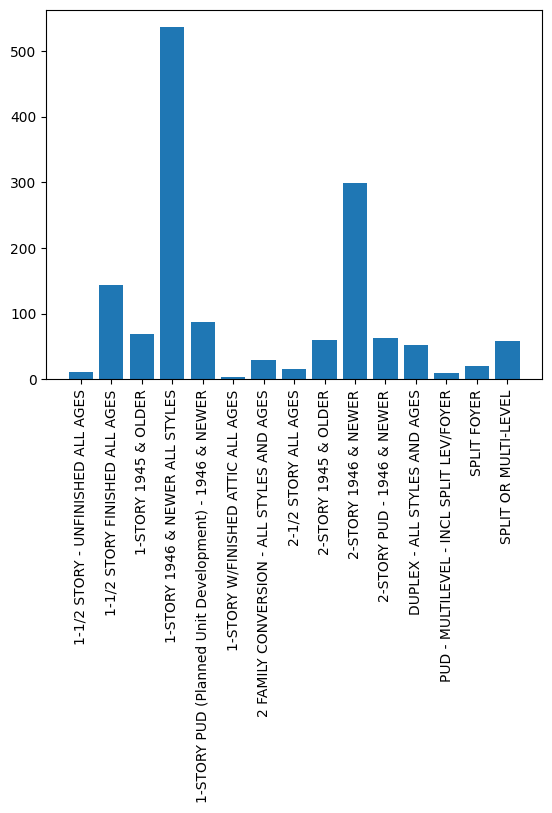

In [5]:
#MSSubClass
#Is represented by an int, will change to readable string for plotting
map = { 
    
    20:'1-STORY 1946 & NEWER ALL STYLES',
        30:	'1-STORY 1945 & OLDER',
        40:	'1-STORY W/FINISHED ATTIC ALL AGES',
        45:	'1-1/2 STORY - UNFINISHED ALL AGES',
        50:	'1-1/2 STORY FINISHED ALL AGES',
        60:	'2-STORY 1946 & NEWER',
        70:	'2-STORY 1945 & OLDER',
        75:	'2-1/2 STORY ALL AGES',
        80:	'SPLIT OR MULTI-LEVEL',
        85:	'SPLIT FOYER',
        90:	'DUPLEX - ALL STYLES AND AGES',
       120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:	'1-1/2 STORY PUD - ALL AGES',
       160:	'2-STORY PUD - 1946 & NEWER',
       180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'

}


train['MSSubClass_name'] = train['MSSubClass'].map(map)


counts = train.groupby('MSSubClass_name').size()


plt.bar(counts.index, counts)
plt.xticks(rotation = 90)


In [6]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

([0, 1, 2],
 [Text(0, 0, 'Residential High Density'),
  Text(1, 0, 'Residential Low Density'),
  Text(2, 0, 'Residential Medium Density')])

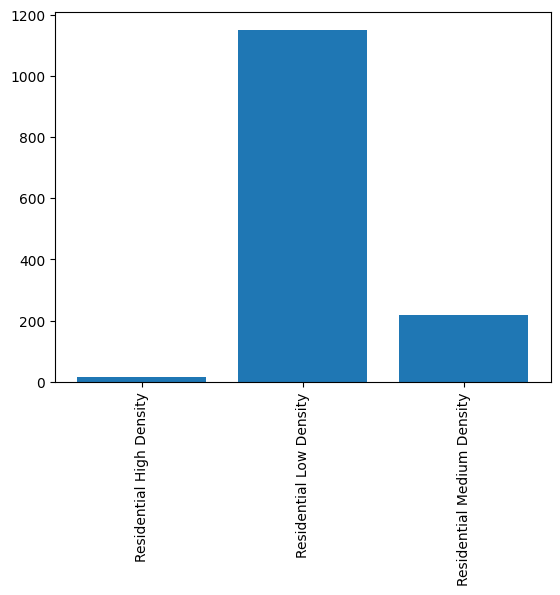

In [7]:
map = { 
"RH":"Residential High Density",
"RL":"Residential Low Density",
"RP":"Residential Low Density Park", 
"RM":"Residential Medium Density"
}


train['Zoning_name'] = train['MSZoning'].map(map)


counts = train.groupby('Zoning_name').size()


plt.bar(counts.index, counts)
plt.xticks(rotation = 90)

We're looking at a lot of low density housing

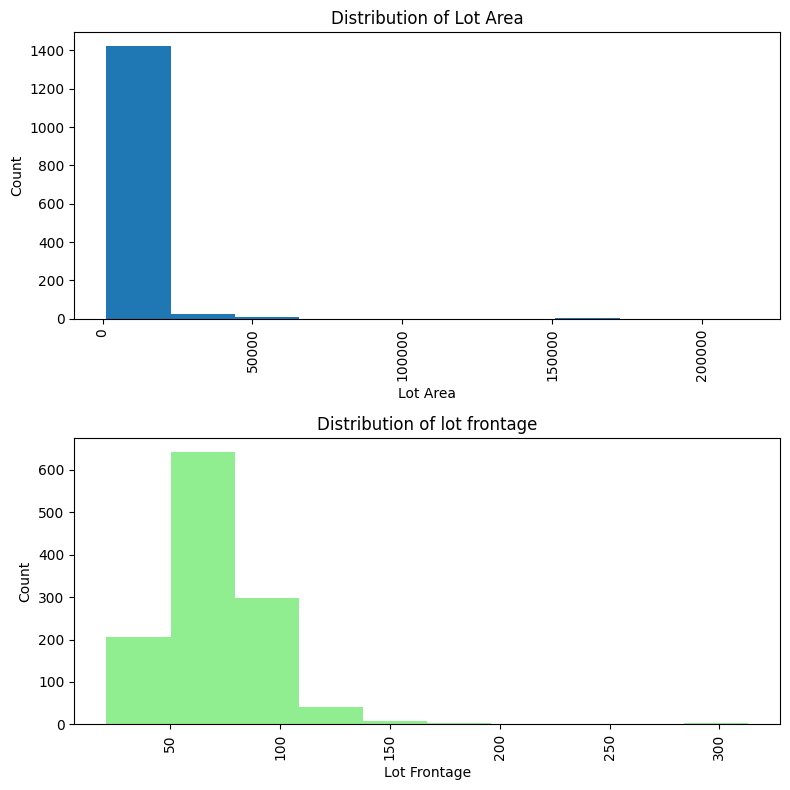

In [8]:


fig, axs = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# Plot the first set of data
axs[0].hist(train['LotArea'])
axs[0].set_xlabel('Lot Area')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Lot Area')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis ticks

# Plot the second set of data
axs[1].hist(train['LotFrontage'], color='lightgreen')
axs[1].set_xlabel('Lot Frontage')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of lot frontage')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis ticks

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
train['logLotArea'] = np.log1p(train['LotArea'])
train['logLotFrontage'] = np.log1p(train['LotFrontage'])

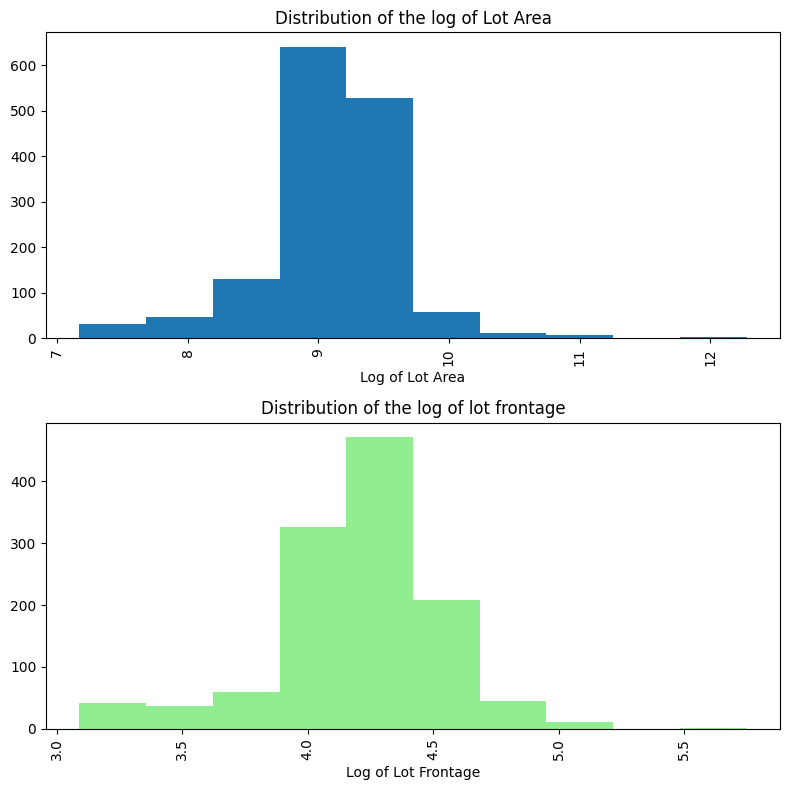

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# Plot the first set of data
axs[0].hist(train['logLotArea'])
axs[0].set_xlabel('Log of Lot Area')
axs[0].set_title('Distribution of the log of Lot Area')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis ticks

# Plot the second set of data
axs[1].hist(train['logLotFrontage'], color='lightgreen')
axs[1].set_xlabel('Log of Lot Frontage')
axs[1].set_title('Distribution of the log of lot frontage')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis ticks

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, '1Fam'),
  Text(1, 0, '2fmCon'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'Twnhs'),
  Text(4, 0, 'TwnhsE')])

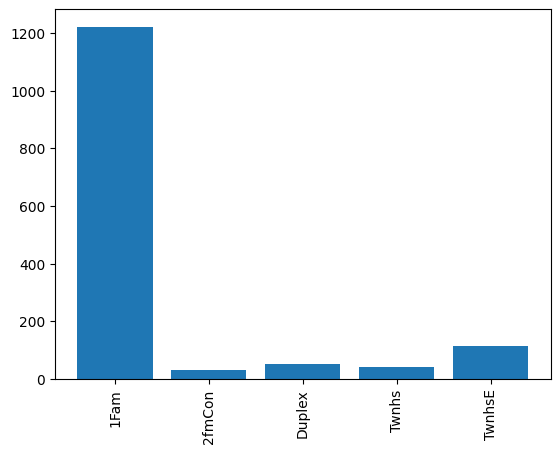

In [11]:
counts = train.groupby('BldgType').size()
plt.bar(counts.index, counts)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '1.5Fin'),
  Text(1, 0, '1.5Unf'),
  Text(2, 0, '1Story'),
  Text(3, 0, '2.5Fin'),
  Text(4, 0, '2.5Unf'),
  Text(5, 0, '2Story'),
  Text(6, 0, 'SFoyer'),
  Text(7, 0, 'SLvl')])

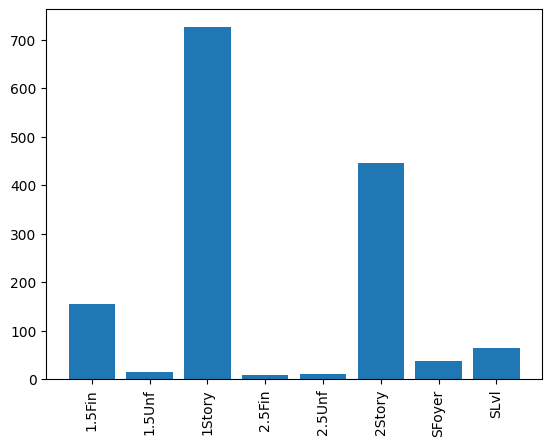

In [12]:
counts = train.groupby('HouseStyle').size()
plt.bar(counts.index, counts)
plt.xticks(rotation = 90)

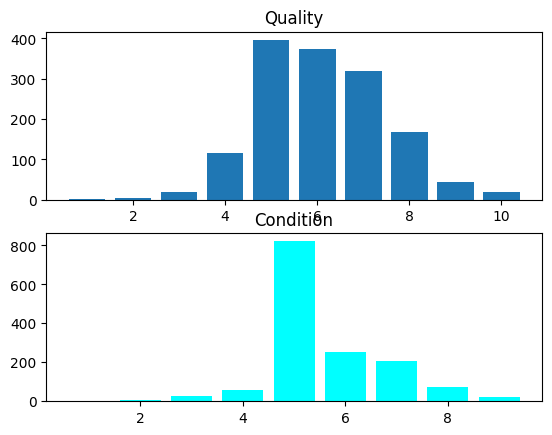

In [13]:
fig, axes = plt.subplots(2,1)


counts = train.groupby('OverallQual').size()
axes[0].bar(counts.index, counts)
axes[0].set_title('Quality')

counts2 = train.groupby('OverallCond').size()
axes[1].bar(counts2.index, counts2, color = 'cyan')
axes[1].set_title('Condition')


plt.show()

array([[<Axes: title={'center': 'YearBuilt'}>]], dtype=object)

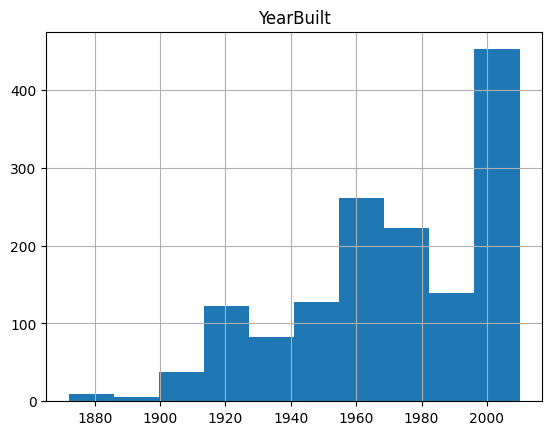

In [14]:
train.hist('YearBuilt')

In [15]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


train['Remodeled'] = (train['YearBuilt'] != train['YearRemodAdd']).astype(int)

<BarContainer object of 2 artists>

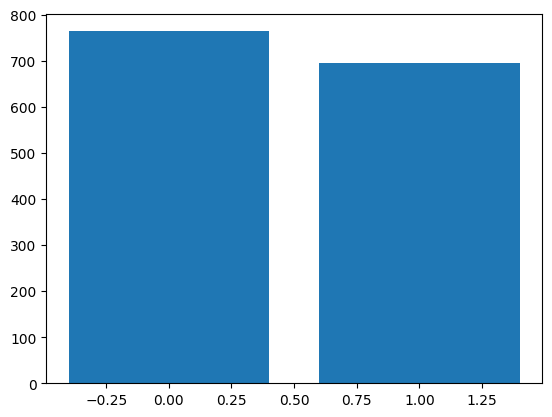

In [16]:
#about half of the houses have been remodeled


counts = train.groupby('Remodeled').size()
plt.bar(counts.index, counts)

array([[<Axes: title={'center': 'MasVnrArea'}>]], dtype=object)

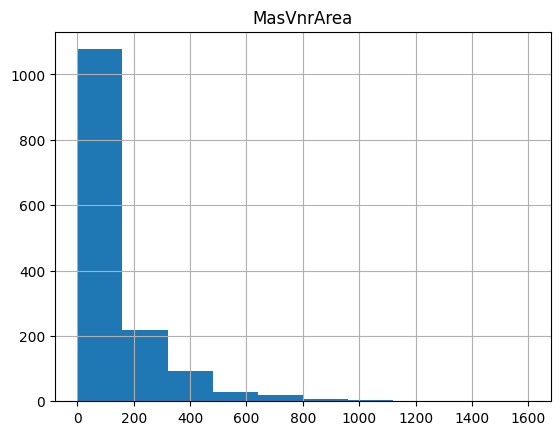

In [17]:
#Masonry veneer Area

train.hist('MasVnrArea')

<BarContainer object of 2 artists>

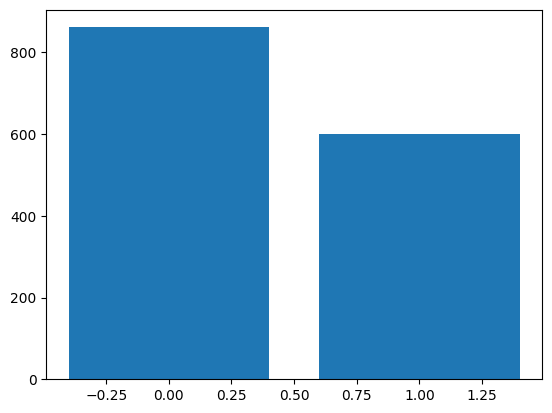

In [18]:
train['logMasVnrArea'] = np.log1p(train['MasVnrArea'])
train['MasVnrArea'] = (train['MasVnrArea'] != 0).astype(int)
counts = train.groupby('MasVnrArea').size()
plt.bar(counts.index, counts)

array([[<Axes: title={'center': 'MasVnrArea'}>]], dtype=object)

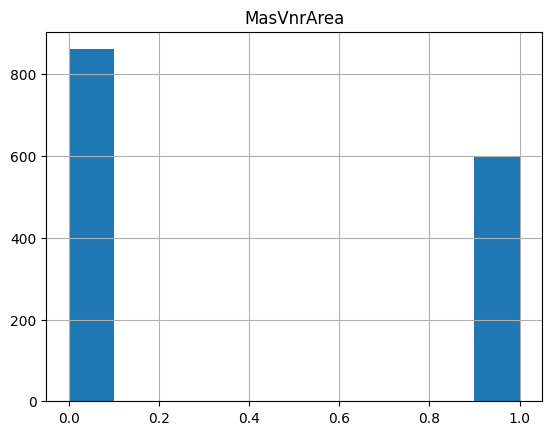

In [19]:

train.hist('MasVnrArea')

array([[<Axes: title={'center': 'logMasVnrArea'}>]], dtype=object)

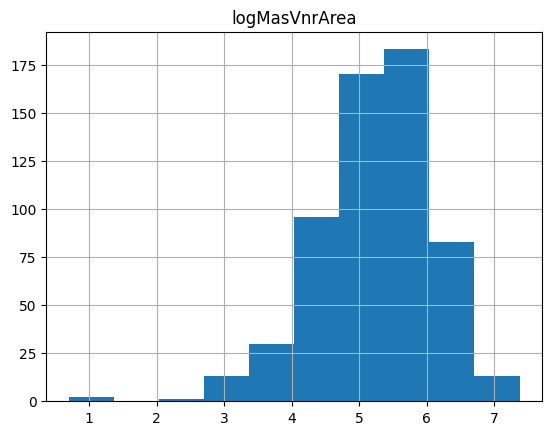

In [20]:
#not exactly sure what masonry veneer area is, but its very skewed so taking the log again to normalize
temp = train[train['MasVnrArea'] == 1]
temp.hist('logMasVnrArea')

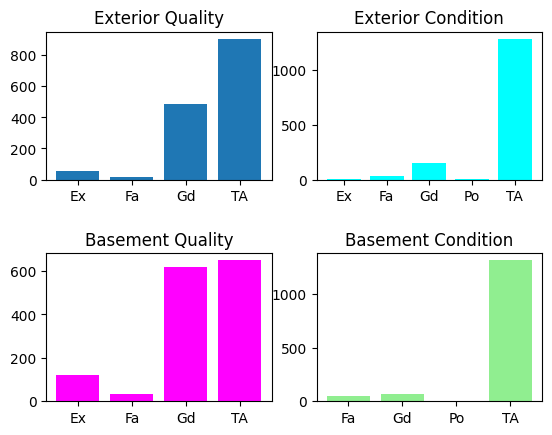

In [21]:

#TA means average


#Basement Quality actually measures the height of the basement, but the data is seperated categorically by certain thresholds
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace=0.5)

counts = train.groupby('ExterQual').size()
axes[0,0].bar(counts.index, counts)
axes[0,0].set_title('Exterior Quality')

counts2 = train.groupby('ExterCond').size()
axes[0,1].bar(counts2.index, counts2, color = 'cyan')
axes[0,1].set_title('Exterior Condition')

counts3 = train.groupby('BsmtQual').size()
axes[1,0].bar(counts3.index, counts3, color = 'magenta')
axes[1,0].set_title('Basement Quality')

counts4 = train.groupby('BsmtCond').size()
axes[1,1].bar(counts4.index, counts4, color = 'lightgreen')
axes[1,1].set_title('Basement Condition')

plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Central Air')

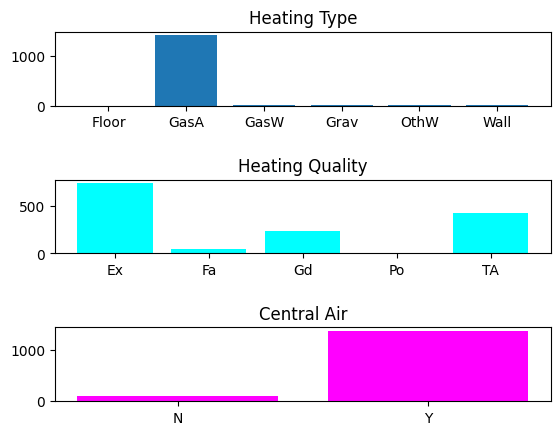

In [22]:
fig, axes = plt.subplots(3,1)
fig.subplots_adjust(hspace=1)

counts = train.groupby('Heating').size()
axes[0].bar(counts.index, counts)
axes[0].set_title('Heating Type')

counts2 = train.groupby('HeatingQC').size()
axes[1].bar(counts2.index, counts2, color = 'cyan')
axes[1].set_title('Heating Quality')

counts3 = train.groupby('CentralAir').size()
axes[2].bar(counts3.index, counts3, color = 'magenta')
axes[2].set_title('Central Air')

Text(0.5, 1.0, '2nd floor square footage')

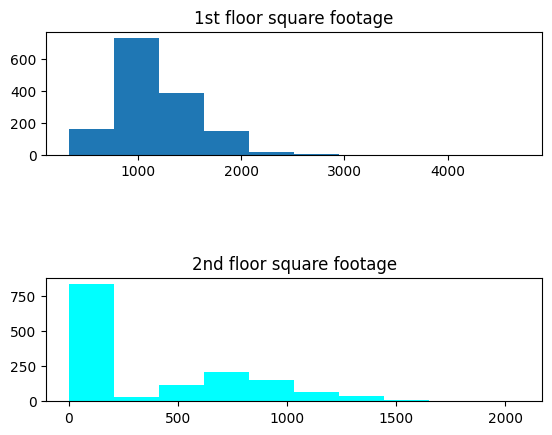

In [23]:
#would definitely consider removing central air all together and only predict on those that have it
#floor sizes


fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=1)


axes[0].hist(train['1stFlrSF'])
axes[0].set_title('1st floor square footage')


axes[1].hist(train['2ndFlrSF'], color = 'cyan')
axes[1].set_title('2nd floor square footage')

(array([  2.,  23., 105., 390., 439., 320., 159.,  18.,   3.,   1.]),
 array([5.81413053, 6.07810021, 6.34206989, 6.60603957, 6.87000925,
        7.13397892, 7.3979486 , 7.66191828, 7.92588796, 8.18985764,
        8.45382732]),
 <BarContainer object of 10 artists>)

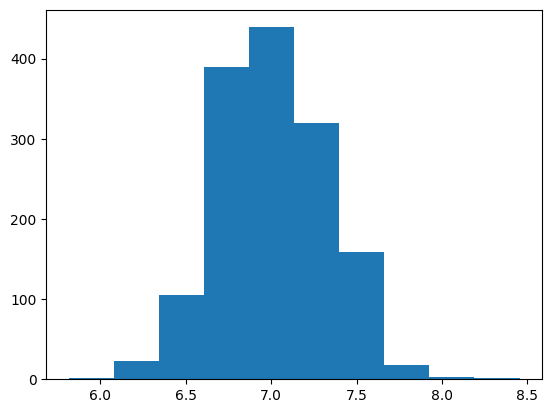

In [24]:
train['log1stFlrSF'] = np.log1p(train['1stFlrSF'])
plt.hist(train['log1stFlrSF'])

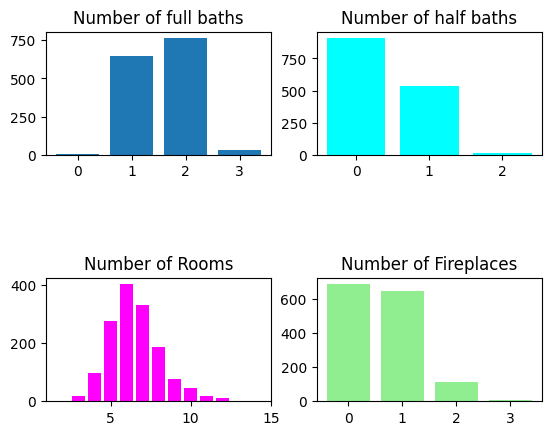

In [25]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace=1)

counts = train.groupby('FullBath').size()
axes[0,0].bar(counts.index, counts)
axes[0,0].set_title('Number of full baths')

counts2 = train.groupby('HalfBath').size()
axes[0,1].bar(counts2.index, counts2, color = 'cyan')
axes[0,1].set_title('Number of half baths')

counts3 = train.groupby('TotRmsAbvGrd').size()
axes[1,0].bar(counts3.index, counts3, color = 'magenta')
axes[1,0].set_title('Number of Rooms')

counts4 = train.groupby('Fireplaces').size()
axes[1,1].bar(counts4.index, counts4, color = 'lightgreen')
axes[1,1].set_title('Number of Fireplaces')

plt.tight_layout
plt.show()

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

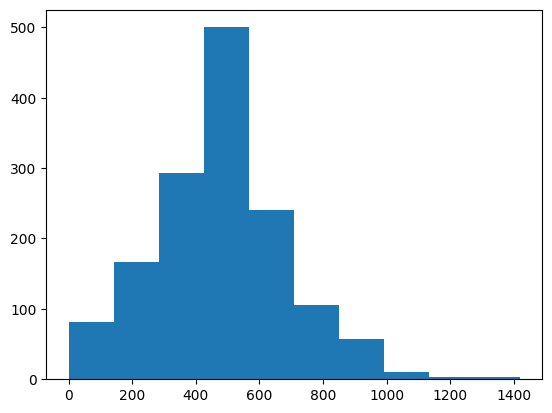

In [26]:
plt.hist(train['GarageArea'])

(array([1.453e+03, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00]),
 array([  0., 123., 246., 369., 492., 615., 738.]),
 <BarContainer object of 6 artists>)

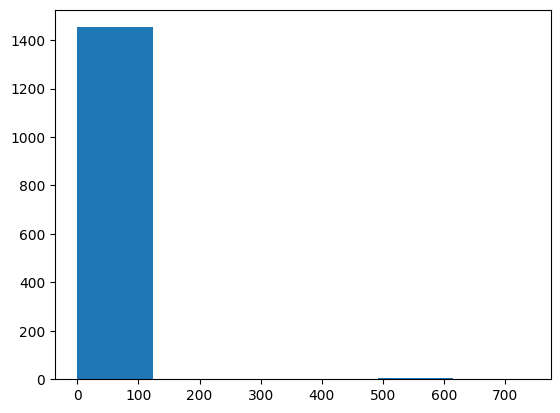

In [27]:
plt.hist(train['PoolArea'],bins = 6)

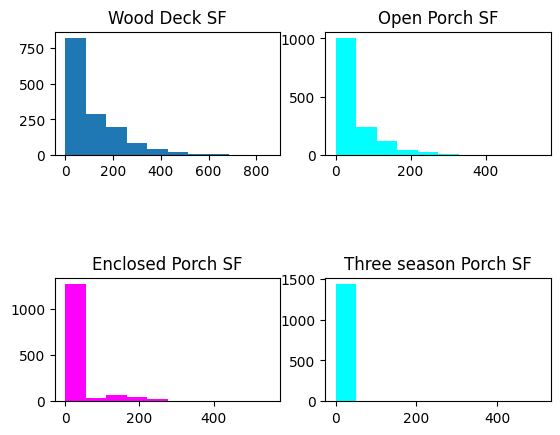

In [28]:
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet


fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace=1)


axes[0,0].hist(train['WoodDeckSF'])
axes[0,0].set_title('Wood Deck SF')


axes[0,1].hist(train['OpenPorchSF'], color = 'cyan')
axes[0,1].set_title('Open Porch SF')


axes[1,0].hist(train['EnclosedPorch'], color = 'magenta')
axes[1,0].set_title('Enclosed Porch SF')


axes[1,1].hist(train['3SsnPorch'], color = 'cyan')
axes[1,1].set_title('Three season Porch SF')

plt.tight_layout
plt.show()

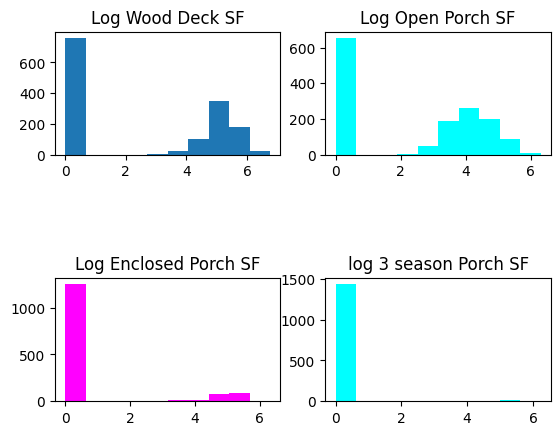

In [29]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(hspace=1)

train['logWoodDeckSF'] = np.log1p(train['WoodDeckSF'])
axes[0,0].hist(train['logWoodDeckSF'])
axes[0,0].set_title('Log Wood Deck SF')

train['logOpenPorchSF'] = np.log1p(train['OpenPorchSF'])
axes[0,1].hist(train['logOpenPorchSF'], color = 'cyan')
axes[0,1].set_title('Log Open Porch SF')

train['logEnclosedPorch'] = np.log1p(train['EnclosedPorch'])
axes[1,0].hist(train['logEnclosedPorch'], color = 'magenta')
axes[1,0].set_title('Log Enclosed Porch SF')

train['log3SsnPorch'] = np.log1p(train['3SsnPorch'])
axes[1,1].hist(train['log3SsnPorch'], color = 'cyan')
axes[1,1].set_title('log 3 season Porch SF')

plt.tight_layout
plt.show()

We can do some feauture engineering before we begin modeling

In [30]:
train['Alley'] = train['Alley'].fillna(0)
train['Age'] = train['YrSold'].astype(int) - train['YearBuilt'].astype(int)

train['AgeSinceRemodel'] = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

Text(0.5, 1.0, 'Years Since Remodeled')

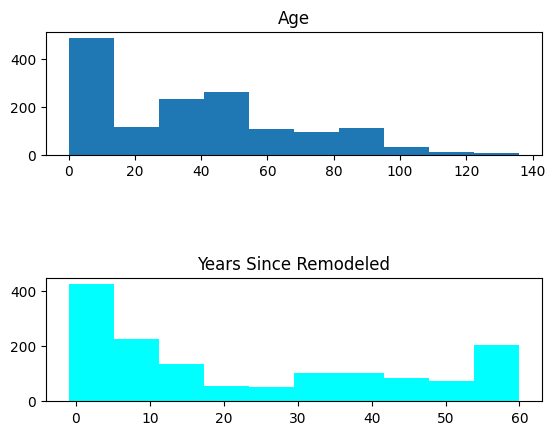

In [31]:
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=1)


axes[0].hist(train['Age'])
axes[0].set_title('Age')


axes[1].hist(train['AgeSinceRemodel'], color = 'cyan')
axes[1].set_title('Years Since Remodeled')

In [33]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
#modeling

import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, mean_squared_error # for scoring
from sklearn.model_selection import GridSearchCV, cross_val_score #cross validation
from sklearn.metrics import confusion_matrix #confusion matrix stuff
import seaborn as sns

VARS = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSSubClass_name', 'Zoning_name',
       'logLotArea', 'logLotFrontage', 'Remodeled', 'logMasVnrArea',
       'log1stFlrSF', 'logWoodDeckSF', 'logOpenPorchSF', 'logEnclosedPorch',
       'log3SsnPorch', 'Age', 'AgeSinceRemodel']


X = train.drop('SalePrice', axis = 1).copy()
y = train['SalePrice'].copy()

#Dummy Vars
X =pd.get_dummies(X,columns = ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass_name', 'Zoning_name',
       'logLotArea', 'logLotFrontage', 'Remodeled', 'logMasVnrArea',
       'log1stFlrSF', 'logWoodDeckSF', 'logOpenPorchSF', 'logEnclosedPorch',
       'log3SsnPorch', 'Age', 'AgeSinceRemodel'])



xgb_reg = xgb.XGBRegressor()

clf = GridSearchCV(xgb_reg, {'max_depth' : [2,4,6,8,10], "n_estimators": [10]},verbose=1)

clf.fit(X,y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8305743849710364
{'max_depth': 4, 'n_estimators': 10}


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21, test_size =0.25)

import graphviz

xgb_reg = xgb.XGBRegressor(max_depth = 4, n_estimators = 10)

xgb_reg.fit(X_train,
            y_train,
            verbose=1,
            early_stopping_rounds = 10,
            
            eval_metric = 'rmse',
            eval_set = [(X_test, y_test)]
            )

score = xgb_reg.score(X_train, y_train)
print('Training Data score: ' + str(score))


cv_score = cross_val_score(xgb_reg, X_train, y_train, cv= 10)
print("CV mean score: " + str(cv_score.mean()))


ypred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

print("MSE: " + str(mse))
print("RMSE: ", str(np.sqrt(mse)))

[0]	validation_0-rmse:63984.60179
[1]	validation_0-rmse:54105.31630


c:\Python\python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Python\python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:46445.57668
[3]	validation_0-rmse:42273.54451
[4]	validation_0-rmse:40690.53542
[5]	validation_0-rmse:39313.21548
[6]	validation_0-rmse:37704.26806
[7]	validation_0-rmse:37355.05731
[8]	validation_0-rmse:37438.53283
[9]	validation_0-rmse:37614.24833
Training Data score: 0.9185132006746659
CV mean score: 0.8341770545511565
MSE: 1395400302.2448936
RMSE:  37355.05725125975


In [ ]:
test_pred = xgb_reg.predict(test)